In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN

df.isnull().sum()[1:6]

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


<Axes: >

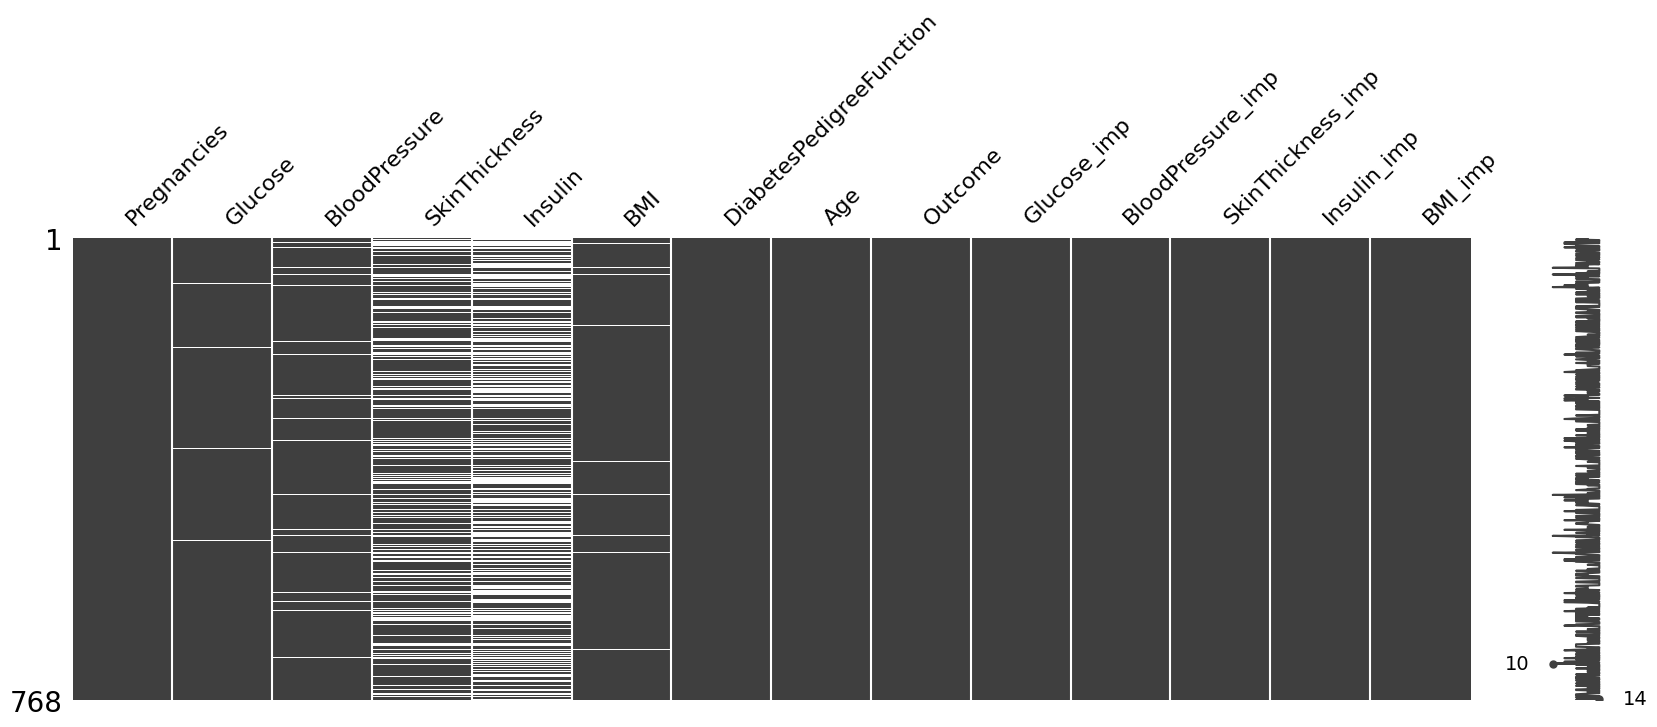

In [15]:
mno.matrix(df, figsize = (20, 6))

In [7]:
missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [9]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)

    return df

In [10]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,148.0,72.0,35.0,120.0,33.6
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,85.0,66.0,29.0,140.0,26.6
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,183.0,64.0,36.0,200.0,23.3
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0,66.0,23.0,94.0,28.1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0,40.0,35.0,168.0,43.1


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958,121.606771,72.407552,29.070312,158.446615,32.469792
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951,30.508837,12.356052,10.395203,121.829983,6.906855
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000,99.000000,64.000000,21.000000,79.000000,27.500000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000,117.000000,72.000000,29.000000,125.000000,32.300000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000,141.000000,80.000000,36.000000,191.000000,36.600000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000


In [13]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:

    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})

    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])

    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

<Axes: >

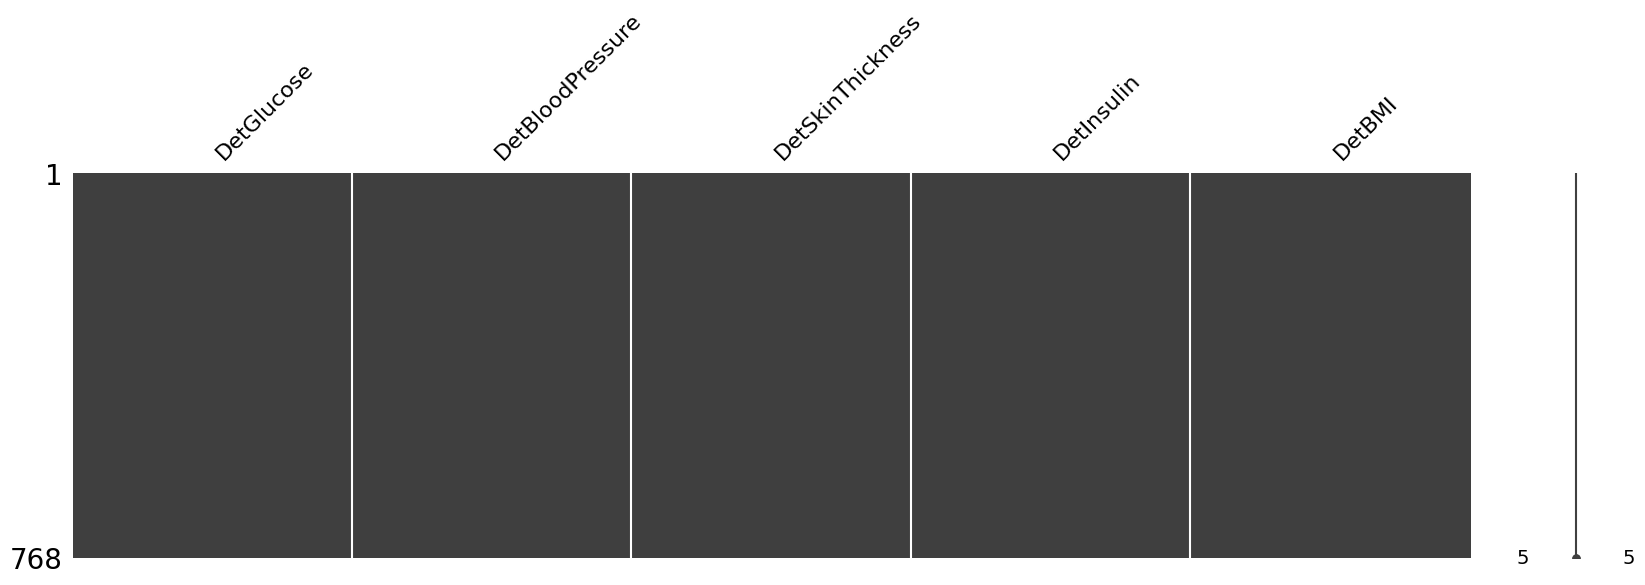

In [14]:
mno.matrix(deter_data, figsize = (20,5))

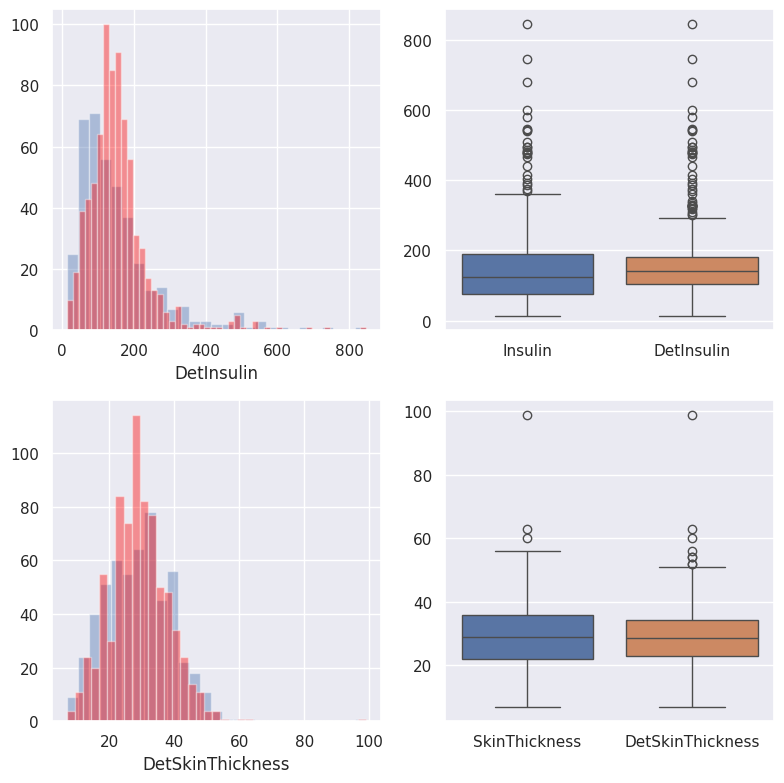

In [16]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(deter_data["Det" + variable], kde = False, ax = axes[index, 0], color = 'red')

    sns.boxplot(data = pd.concat([df[variable], deter_data["Det" + variable]], axis = 1),
                ax = axes[index, 1])

plt.tight_layout()

In [17]:
pd.concat([df[["Insulin", "SkinThickness"]], deter_data[["DetInsulin", "DetSkinThickness"]]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Insulin,394.0,155.548223,118.775855,14.0,76.250000,125.000000,190.000000,846.0
SkinThickness,541.0,29.153420,10.476982,7.0,22.000000,29.000000,36.000000,99.0
DetInsulin,768.0,155.208702,89.659327,14.0,105.035888,141.533405,182.000000,846.0
DetSkinThickness,768.0,29.000897,9.159335,7.0,23.000000,28.650920,34.429791,99.0


In [18]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

for feature in missing_columns:

    random_data["Ran" + feature] = df[feature + '_imp']
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})

    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])

    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(df[parameters])
    std_error = (predict[df[feature].notnull()] - df.loc[df[feature].notnull(), feature + '_imp']).std()

    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = df[feature].shape[0],
                                      loc = predict,
                                      scale = std_error)
    random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df[feature].isnull()) &
                                                                            (random_predict > 0)]

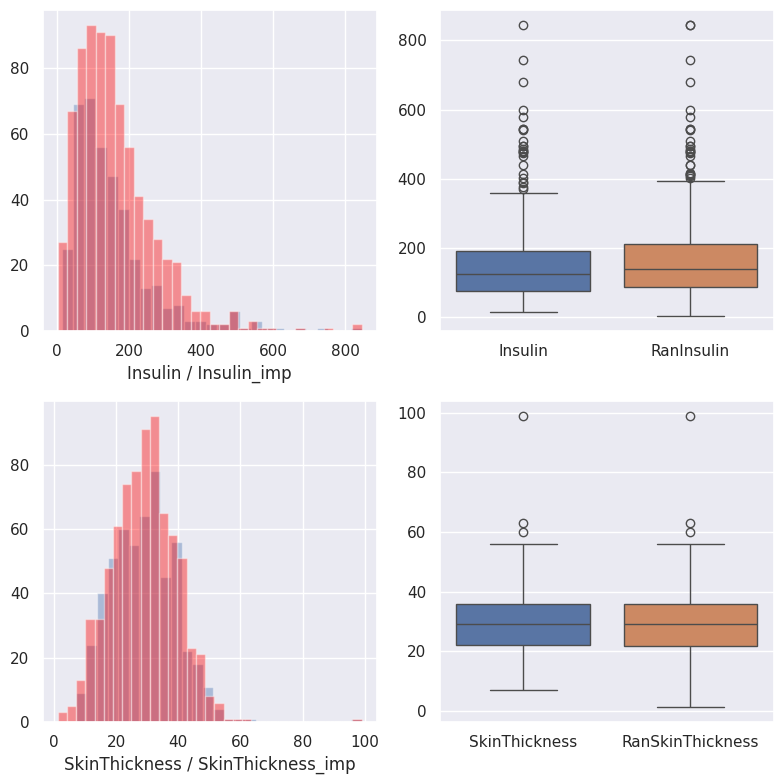

In [19]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(random_data["Ran" + variable], kde = False, ax = axes[index, 0], color = 'red')
    axes[index, 0].set(xlabel = variable + " / " + variable + '_imp')

    sns.boxplot(data = pd.concat([df[variable], random_data["Ran" + variable]], axis = 1),
                ax = axes[index, 1])

    plt.tight_layout()

In [20]:
pd.concat([df[["Insulin", "SkinThickness"]], random_data[["RanInsulin", "RanSkinThickness"]]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Insulin,394.0,155.548223,118.775855,14.000000,76.250000,125.0,190.000000,846.0
SkinThickness,541.0,29.153420,10.476982,7.000000,22.000000,29.0,36.000000,99.0
RanInsulin,768.0,162.329533,110.146496,1.885712,86.474859,140.0,210.000000,846.0
RanSkinThickness,768.0,28.781115,10.334756,1.209995,21.931579,29.0,35.830097,99.0


In [21]:
import scipy.stats as st

In [22]:
a = df["Insulin"].dropna()
b = deter_data["DetInsulin"]
c = df["SkinThickness"].dropna()
d = deter_data["DetSkinThickness"]

In [32]:
norm = np.random.normal(size = 5000, loc = 20, scale = 3)
norm2 = np.random.normal(size = 7000, loc = 20, scale = 3)

In [28]:
st.normaltest(c)

# if pvalue > 0.05 -> this is normally distributed data

NormaltestResult(statistic=78.33502461686827, pvalue=9.76709775832724e-18)

In [33]:
st.ttest_ind(norm, norm2) # only with normal distribution

TtestResult(statistic=-0.5497212296920289, pvalue=0.5825208254166563, df=11998.0)

In [35]:
st.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=135784.0, pvalue=0.004177977583593973)